![alt text](https://drive.google.com/uc?export=view&id=1UXScsVx_Wni_JuDdB8LeTnM6jsPfIwkW)

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# Instructions
- Some parts of the code are already done for you
- You need to execute all the cells
- You need to add the code where ever you see `"#### Add your code here ####"`
- Marks are mentioned along with the cells

# Face recognition
Task is to recognize a faces

### Dataset
**Aligned Face Dataset from Pinterest**

This dataset contains 10.770 images for 100 people. All images are taken from 'Pinterest' and      aligned using dlib library.

In [1]:
import tensorflow
tensorflow.__version__

'2.3.0'

#### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local

In [2]:
import random
random.seed(0)

import warnings
warnings.filterwarnings("ignore")

from google.colab import drive
drive.mount('/content/drive')
# mounting the drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Change current working directory to project folder (2 marks)

In [3]:
project_path = '/content/drive/My Drive/Networks/'

### Extract the zip file (3 marks)
- Extract Aligned Face Dataset from Pinterest.zip

In [4]:
images_zip_path = project_path + "Aligned Face Dataset from Pinterest.zip"

from zipfile import ZipFile

with ZipFile(images_zip_path, 'r') as s:
  s.extractall()

  # Extracting the folders into the same directory

### Function to load images
- Define a function to load the images from the extracted folder and map each image with person id 


In [5]:
import numpy as np
import os

class IdentityMetadata():

    def __init__(self, base, name, file):
        # print(base, name, file)

        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 
    
def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
          
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

metadata = load_metadata('PINS')
# PINS - the extracted zip file contains a folder called "PINS"

In [6]:
len(metadata)
# there are 10770 images which are jpg or jpeg

10770

### Define function to load image
- Define a function to load image from the metadata

In [7]:
import cv2

def load_image(path):
    img = cv2.imread(path, 1)
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them
    return img[...,::-1]

#### Load a sample image (3 marks)
- Load one image using the function "load_image"

In [8]:
import numpy as np

c = np.random.randint(0, (len(metadata)))

In [9]:
c
# printing the randomly generated number within the specified range

4934

In [10]:
metadata[c]
# printing the image corresponding to the nunmber

PINS/pins_Dwayne Johnson/Dwayne Johnson9.jpg

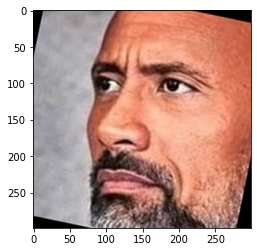

In [12]:
import matplotlib.pyplot as plt

img = load_image("PINS/pins_Dwayne Johnson/Dwayne Johnson9.jpg")
plt.imshow(img)

### VGG Face model
- Here we are giving you the predefined model for VGG face

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation

def vgg_face():	
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model

#### Load the model (3 marks)
- Load the model defined above
- Then load the given weight file named "vgg_face_weights.h5"

In [14]:
model = vgg_face()
model.load_weights(project_path + "vgg_face_weights.h5")

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 226, 226, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 226, 226, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 114, 114, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     7

### Get vgg_face_descriptor

In [16]:
from tensorflow.keras.models import Model
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

### Generate embeddings for each image in the dataset
- Given below is an example to load the first image in the metadata and get its embedding vector from the pre-trained model. 

In [17]:
# Get embedding vector for first image in the metadata using the pre-trained model

img_path = metadata[0].image_path()
img = load_image(img_path)

# Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
img = (img / 255.).astype(np.float32)

img = cv2.resize(img, dsize = (224,224))
print(img.shape)

# Obtain embedding vector for an image
# Get the embedding vector for the above image using vgg_face_descriptor model and print the shape 

embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
print(embedding_vector.shape)

(224, 224, 3)
(2622,)


### Generate embeddings for all images (8 marks)
- Write code to iterate through metadata and create embeddings for each image using `vgg_face_descriptor.predict()` and store in a list with name `embeddings`

- If there is any error in reading any image in the dataset, fill the emebdding vector of that image with 2622-zeroes as the final embedding from the model is of length 2622.

In [18]:
from tqdm import tqdm

embeddings = np.zeros((metadata.shape[0], 2622))

for i, m in tqdm(enumerate(metadata)):
  
  try:

    img_path = m.image_path()
    img = load_image(img_path)

    img = (img / 255.).astype(np.float32)
    img = cv2.resize(img, dsize = (224,224))
    
    embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]

    embeddings[i] = embedding_vector

  except:
    embeddings[i] = np.zeros(2622)

10770it [16:54, 10.61it/s]


In [19]:
embeddings.shape

  # all the embeddings are added into a list called "EMBEDDINGS" and its shape is as follows

(10770, 2622)

### Function to calculate distance between given 2 pairs of images.

- Consider distance metric as "Squared L2 distance"
- Squared l2 distance between 2 points (x1, y1) and (x2, y2) = (x1-x2)^2 + (y1-y2)^2

In [20]:
def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

#### Plot images and get distance between the pairs given below
- 2, 3 and 2, 180
- 30, 31 and 30, 100
- 70, 72 and 70, 115

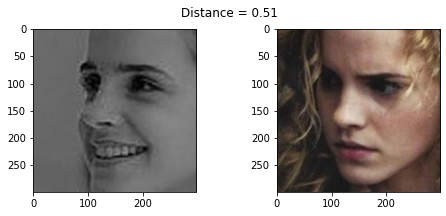

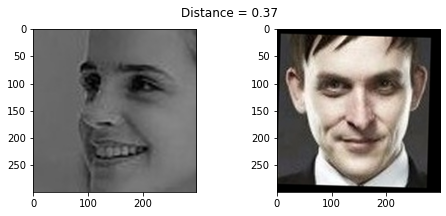

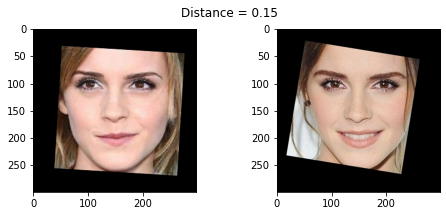

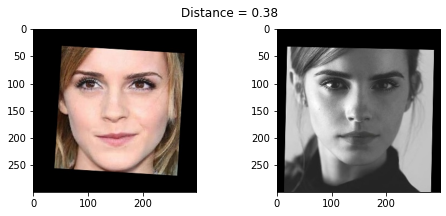

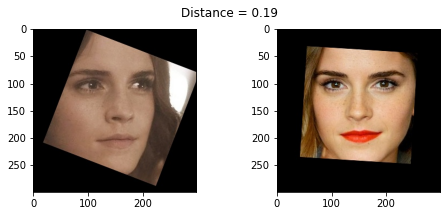

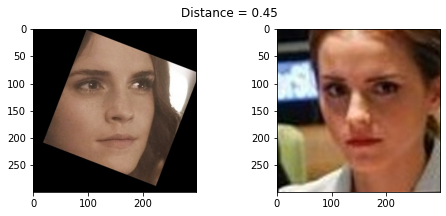

In [21]:
import matplotlib.pyplot as plt

def show_pair(idx1, idx2):
    plt.figure(figsize=(8,3))
    plt.suptitle(f'Distance = {distance(embeddings[idx1], embeddings[idx2]):.2f}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path()));    

show_pair(2, 3)
show_pair(2, 180)
show_pair(30, 31)
show_pair(30, 100)
show_pair(70, 72)
show_pair(70, 115)

### Create train and test sets (8 marks)
- Create X_train, X_test and y_train, y_test
- Use train_idx to seperate out training features and labels
- Use test_idx to seperate out testing features and labels

In [22]:
train_idx = np.arange(metadata.shape[0]) % 9 != 0     #every 9th example goes in test data and rest go in train data
test_idx = np.arange(metadata.shape[0]) % 9 == 0

# one half as train examples of 10 identities
X_train = embeddings[train_idx]

# another half as test examples of 10 identities
X_test = embeddings[test_idx]

targets = np.array([m.name for m in metadata])

#train labels
y_train = targets[train_idx]
#test labels
y_test = targets[test_idx]

In [23]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(9573, 2622)
(9573,)
(1197, 2622)
(1197,)


### Encode the Labels (4 marks)
- Encode the targets
- Use LabelEncoder

In [24]:
y_train[0]
# before label encoding

'pins_emma watson face'

In [25]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_le = le.fit_transform(y_train)
y_test_le = le.fit_transform(y_test)

In [26]:
y_train_le[0]
# after label encoding

78

### Standardize the feature values (4 marks)
- Scale the features using StandardScaler

In [27]:
# Standarize features
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.fit_transform(X_test)

### Reduce dimensions using PCA (4 marks)
- Reduce feature dimensions using Principal Component Analysis
- Set the parameter n_components=128

In [28]:
from sklearn.decomposition import PCA

pca = PCA(n_components=128,random_state=10)
pca.fit(X_train_ss)

PCA(copy=True, iterated_power='auto', n_components=128, random_state=10,
    svd_solver='auto', tol=0.0, whiten=False)

In [29]:
print('The explained variance is: \n \n',pca.explained_variance_)

The explained variance is: 
 
 [354.34004244 141.76252046 103.7774857   96.34609764  88.28946076
  82.72433522  67.71239952  61.83946523  54.84683068  51.02634817
  47.92840379  44.86252761  43.57243192  41.13129039  37.38461501
  35.81086355  34.44616862  32.08176179  30.35645956  29.89237164
  28.59348091  27.87487409  25.21194575  24.67525932  23.79206978
  23.26135699  22.04117033  20.06760677  19.99378583  19.27551013
  18.42848002  17.40356449  16.5458643   16.34019657  14.93690297
  14.02031913  13.90574385  13.505817    13.18635154  12.80604464
  11.68017769  11.29162796  10.48754617  10.33190029   9.69882396
   9.29290748   8.99540724   8.84840981   8.61934367   8.38317622
   8.19816893   7.99531525   7.57673301   7.41186306   7.26884317
   7.2002931    7.07606402   6.856622     6.67307976   6.5873092
   6.21864515   6.07324164   5.9167359    5.69624628   5.52568316
   5.3629625    5.26130993   5.05883278   4.95437217   4.79284756
   4.77508235   4.6674973    4.57770165   4.51

In [30]:
print('The cumulative explained variance ration is: \n\n',np.cumsum(pca.explained_variance_ratio_))

# It is evident that the 128 components sum up to contribtue 86.65% of variance

The cumulative explained variance ration is: 

 [0.13512701 0.18918793 0.2287633  0.26550474 0.29917378 0.33072058
 0.35654259 0.38012497 0.40104073 0.42049954 0.43877696 0.45588522
 0.47250149 0.48818685 0.50244341 0.51609983 0.52923582 0.54147015
 0.55304654 0.56444594 0.57535002 0.58598006 0.5955946  0.60500447
 0.61407754 0.62294822 0.63135358 0.63900633 0.64663093 0.65398162
 0.66100929 0.66764611 0.67395585 0.68018716 0.68588332 0.69122995
 0.69653288 0.7016833  0.7067119  0.71159546 0.71604968 0.72035572
 0.72435513 0.72829519 0.73199382 0.73553765 0.73896804 0.74234236
 0.74562934 0.74882625 0.75195261 0.75500161 0.75789098 0.76071749
 0.76348945 0.76623527 0.76893371 0.77154848 0.77409324 0.7766053
 0.77897677 0.78129279 0.78354913 0.78572139 0.7878286  0.78987375
 0.79188015 0.79380932 0.79569867 0.79752641 0.79934738 0.80112732
 0.80287302 0.80459636 0.80628918 0.80794864 0.80958728 0.81120823
 0.81279159 0.81435762 0.81589384 0.81740384 0.81885455 0.82029851
 0.82171828 0.8

In [31]:
X_pca = pca.transform(X_train_ss)
X_pca.shape

(9573, 128)

### Build a Classifier (4 marks)
- Use SVM Classifier to predict the person in the given image
- Fit the classifier and print the score

In [32]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [33]:
# after grid search, the best params was found as follows:

svm = SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel="linear",
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


svm.fit(X_train_ss,y_train_le)
svm.score(X_test_ss,y_test_le)
# test score accuracy is around 96%

0.9649122807017544

In [34]:
svm.score(X_train_ss,y_train_le)
# the train set acuuracy is almost 100% which is a REAL good score

0.9997910790765695

### Test results (2 mark)
- Take 10th image from test set and plot the image
- Report to which person(folder name in dataset) the image belongs to

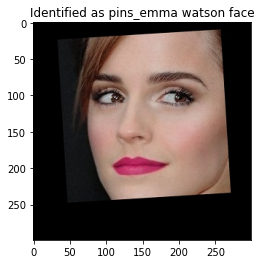

In [96]:
import warnings
# Suppress LabelEncoder warning
warnings.filterwarnings('ignore')

example_idx = 10
y_pred = svm.predict(X_test_ss)
example_image = load_image(metadata[test_idx][example_idx].image_path())
example_prediction = y_pred

example_identity = le.inverse_transform(example_prediction)[10]

plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');

In [98]:
# Imported the image dataset and used the pre trained model and saved weights to run the classifier. After which,
# PCA was used to reduce dimensionality and SVC was used to classify the images. There was an whooping train accuracy of 99.9% and 
# test accuracy of 96.5%